In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [92]:
%qtconsole

In [127]:
%cd /Users/cgu3/Documents/conditional-graph-variational-autoencoder
%pwd

/Users/cgu3/Documents/conditional-graph-variational-autoencoder


'/Users/cgu3/Documents/conditional-graph-variational-autoencoder'

In [582]:
# df = pd.read_json('results/results2.json', lines=True)
df = pd.read_json('results/final_cora_results.json', lines=True)
# df = pd.read_json('results/final_citeseer_results.json', lines=True)
# round df['false_pos_edge_ratio'] to 1 decimal
df['false_pos_edge_ratio'] = df['false_pos_edge_ratio'].round(2)
df['split_ratio'] = df['split_ratio'].round(2)

In [583]:
# calculate mean and std for auc and ap group by dataset and split_ratio
df_agg = df.groupby(['dataset', 'split_ratio', 'false_pos_edge_ratio', 'add_input_edges_to_output', 'regularization']).agg({'AUC': ['mean', 'std'], 'AP': ['mean', 'std'], 'execution_time': ['mean', 'std'], 'best_epochs': 'mean'})
# ungroup the index
df_agg = df_agg.reset_index()
# combine name use '_' if it has multiple levels
df_agg.columns = ['_'.join(col).strip('_') for col in df_agg.columns.values]

In [584]:
df_agg.sort_values(by=['split_ratio', 'false_pos_edge_ratio', 'regularization'], ascending=False)

,dataset,split_ratio,false_pos_edge_ratio,add_input_edges_to_output,regularization,AUC_mean,AUC_std,AP_mean,AP_std,execution_time_mean,execution_time_std,best_epochs_mean
67,Cora,0.70,0.5,False,100000,0.616278,0.013259,0.654544,0.013085,7.122222,0.266072,20.555556
66,Cora,0.70,0.5,False,10000,0.642144,0.020135,0.669033,0.020450,25.691111,4.029821,691.888889
65,Cora,0.70,0.5,False,1000,0.645700,0.032687,0.679433,0.032376,14.537778,6.285015,277.222222
64,Cora,0.70,0.5,False,100,0.635378,0.015725,0.670867,0.012999,11.087778,0.800262,147.888889
63,Cora,0.70,0.5,False,10,0.634133,0.022963,0.670489,0.019454,10.616667,0.566017,139.888889
...,...,...,...,...,...,...,...,...,...,...,...,...
3,Cora,0.33,0.0,False,1000,0.737430,0.064100,0.766100,0.053695,17.160000,6.097373,383.900000
2,Cora,0.33,0.0,False,100,0.718830,0.061857,0.755730,0.046777,16.210000,7.940232,344.800000
1,Cora,0.33,0.0,False,10,0.707650,0.057472,0.747930,0.043442,14.191000,5.700178,271.800000
0,Cora,0.33,0.0,False,0,0.706570,0.057475,0.748080,0.043079,13.908000,5.554315,271.500000


In [585]:
# get best performance for each combination of dataset, split_ratio, false_pos_edge_ratio
df_best = df_agg.groupby(['dataset', 'split_ratio', 'false_pos_edge_ratio', 'add_input_edges_to_output']).apply(lambda x: x.loc[x['AUC_mean'].idxmax()])[['AUC_mean']]
# pivot to wider based on add_input_edges_to_output and rename the new columns to AUC_mean
df_best = df_best.pivot_table(index=['dataset', 'split_ratio', 'false_pos_edge_ratio'], columns='add_input_edges_to_output', values='AUC_mean')
# rename False to False_AUC_mean and True to True_AUC_mean
df_best = df_best.rename(columns={False: 'WR_AUC', True: 'WOR_AUC'})
df_best.columns.name = None
df_best

WR_AUC  WOR_AUC
dataset split_ratio false_pos_edge_ratio                   
Cora    0.33        0.00                  0.778340  0.70968
                    0.25                  0.718550  0.67971
                    0.50                  0.655980  0.61685
        0.50        0.00                  0.786900  0.74841
                    0.25                  0.677450  0.63833
                    0.30                  0.745900      NaN
                    0.50                  0.659030  0.62381
        0.70        0.00                  0.797800  0.76478
                    0.25                  0.695344  0.66010
                    0.50                  0.645700  0.64947

# plot AUC for each dataset and each split_ratio, with regularization in x-axis



In [586]:
df[(df['split_ratio'] ==  0.33) & (df['false_pos_edge_ratio'] == 0.25)]

,dataset,split_ratio,seed,best_epochs,val_best_loss,AUC,AP,learning_rate,regularization,neg_sample_ratio,false_pos_edge_ratio,add_input_edges_to_output,execution_time,time_stamp
6,Cora,0.33,36,124,0.6739,0.6514,0.7084,0.005,0,1,0.25,False,11.00,2024-09-15 12:36:34
7,Cora,0.33,36,124,0.6745,0.6484,0.7081,0.005,10,1,0.25,False,9.78,2024-09-15 12:36:48
8,Cora,0.33,36,124,0.6740,0.6523,0.7121,0.005,100,1,0.25,False,9.97,2024-09-15 12:37:04
9,Cora,0.33,36,135,0.6749,0.6687,0.7277,0.005,1000,1,0.25,False,10.32,2024-09-15 12:37:19
10,Cora,0.33,36,296,0.6700,0.6683,0.7262,0.005,10000,1,0.25,False,14.86,2024-09-15 12:37:38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
574,Cora,0.33,41,414,0.6255,0.7283,0.7447,0.005,0,1,0.25,True,26.47,2024-09-15 12:05:46
583,Cora,0.33,42,293,0.6517,0.6436,0.6754,0.005,0,1,0.25,True,19.76,2024-09-15 12:09:38
592,Cora,0.33,43,224,0.6613,0.6437,0.6657,0.005,0,1,0.25,True,16.78,2024-09-15 12:12:37
601,Cora,0.33,44,997,0.6261,0.7745,0.7948,0.005,0,1,0.25,True,38.92,2024-09-15 12:16:48


In [587]:
df_current = df[(df['seed'] == 43) & (df['split_ratio'] == split_ratio) & (df['false_pos_edge_ratio'] == false_pos_edge_ratio) & (df['add_input_edges_to_output'] == False)]
df_current

,dataset,split_ratio,seed,best_epochs,val_best_loss,AUC,AP,learning_rate,regularization,neg_sample_ratio,false_pos_edge_ratio,add_input_edges_to_output,execution_time,time_stamp
414,Cora,0.5,43,163,0.6736,0.6263,0.6720,0.005,0,1,0.5,False,6.50,2024-09-12 11:58:11
415,Cora,0.5,43,163,0.6735,0.6257,0.6719,0.005,10,1,0.5,False,6.43,2024-09-12 11:58:21
416,Cora,0.5,43,178,0.6742,0.6267,0.6737,0.005,100,1,0.5,False,6.46,2024-09-12 11:58:30
417,Cora,0.5,43,213,0.6712,0.6210,0.6733,0.005,1000,1,0.5,False,7.16,2024-09-12 11:58:41
418,Cora,0.5,43,506,0.6734,0.6293,0.6669,0.005,10000,1,0.5,False,13.97,2024-09-12 11:58:58
419,Cora,0.5,43,26,0.6923,0.5951,0.6170,0.005,100000,1,0.5,False,4.25,2024-09-12 11:59:10


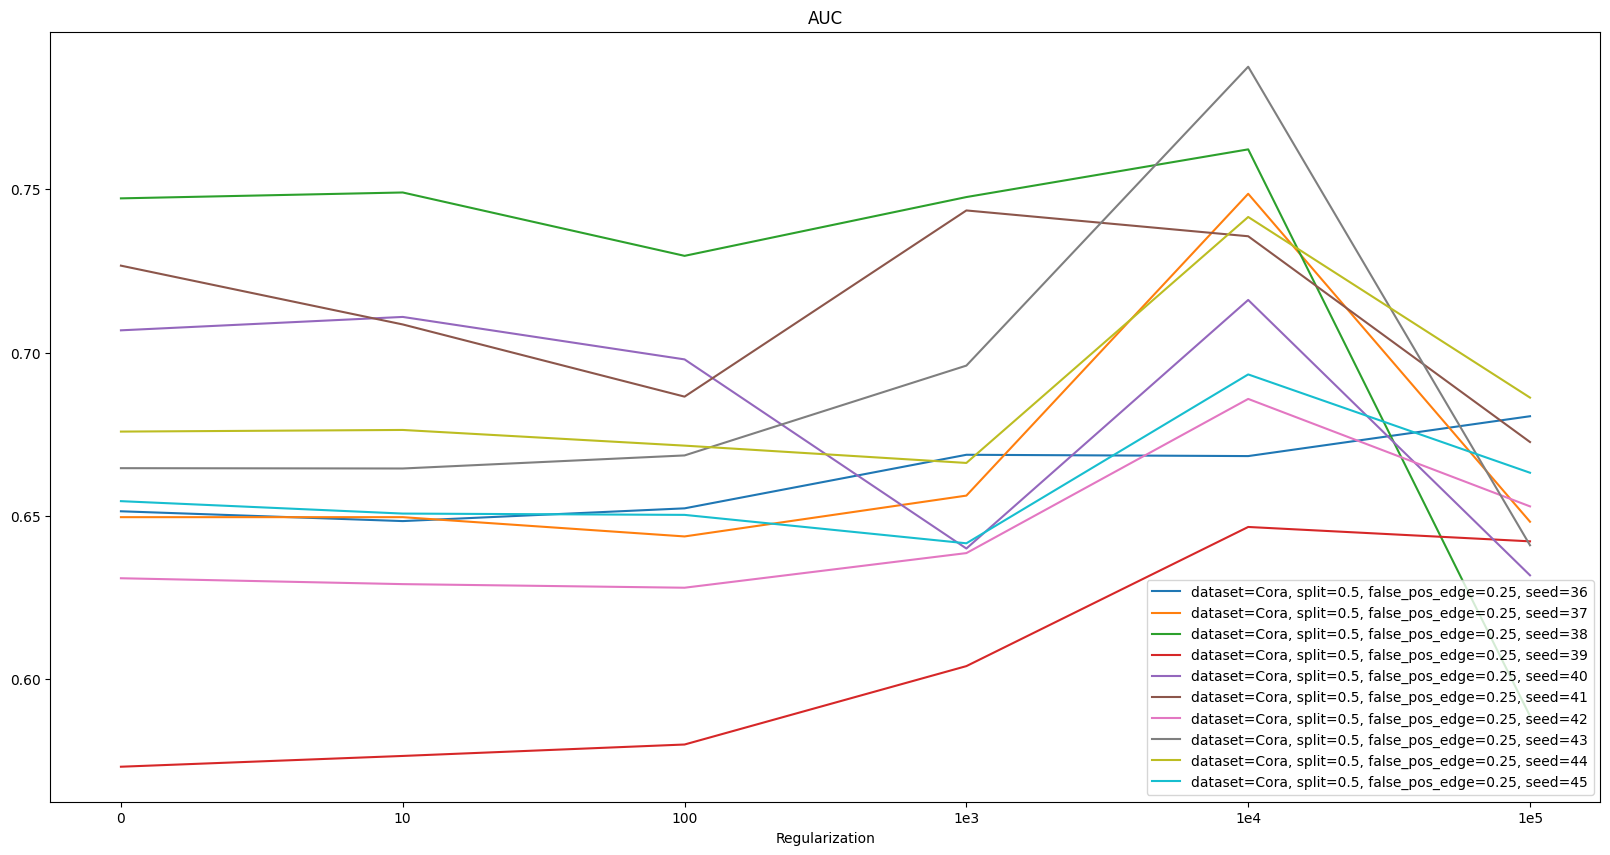

In [590]:
fig, ax = plt.subplots(figsize=(20, 10))

# Get unique seeds
dataset = 'Cora'
split_ratio = 0.33
false_pos_edge_ratio = 0.25
seeds = df['seed'].unique()

# plot AUC
for seed in seeds:
    df_current = df[(df['seed'] == seed) & (df['split_ratio'] == split_ratio) & (df['false_pos_edge_ratio'] == false_pos_edge_ratio) & (df['add_input_edges_to_output'] == False)]
    ax.plot([0, 1, 2, 3, 4, 5], df_current['AUC'],
               label=f'dataset={dataset}, split={split}, false_pos_edge={false_pos_edge_ratio}, seed={seed}')
ax.set_xticks([0, 1, 2, 3, 4, 5])
ax.set_xticklabels(['0', '10', '100', '1e3', '1e4', '1e5'])
ax.set_xlabel('Regularization')
ax.set_title('AUC')
ax.legend()

In [501]:
df_agg[(df_agg['split_ratio'] == split_ratio) & (df_agg['false_pos_edge_ratio'] == false_pos_edge_ratio)]

,dataset,split_ratio,false_pos_edge_ratio,add_input_edges_to_output,regularization,AUC_mean,AUC_std,AP_mean,AP_std,execution_time_mean,execution_time_std,best_epochs_mean


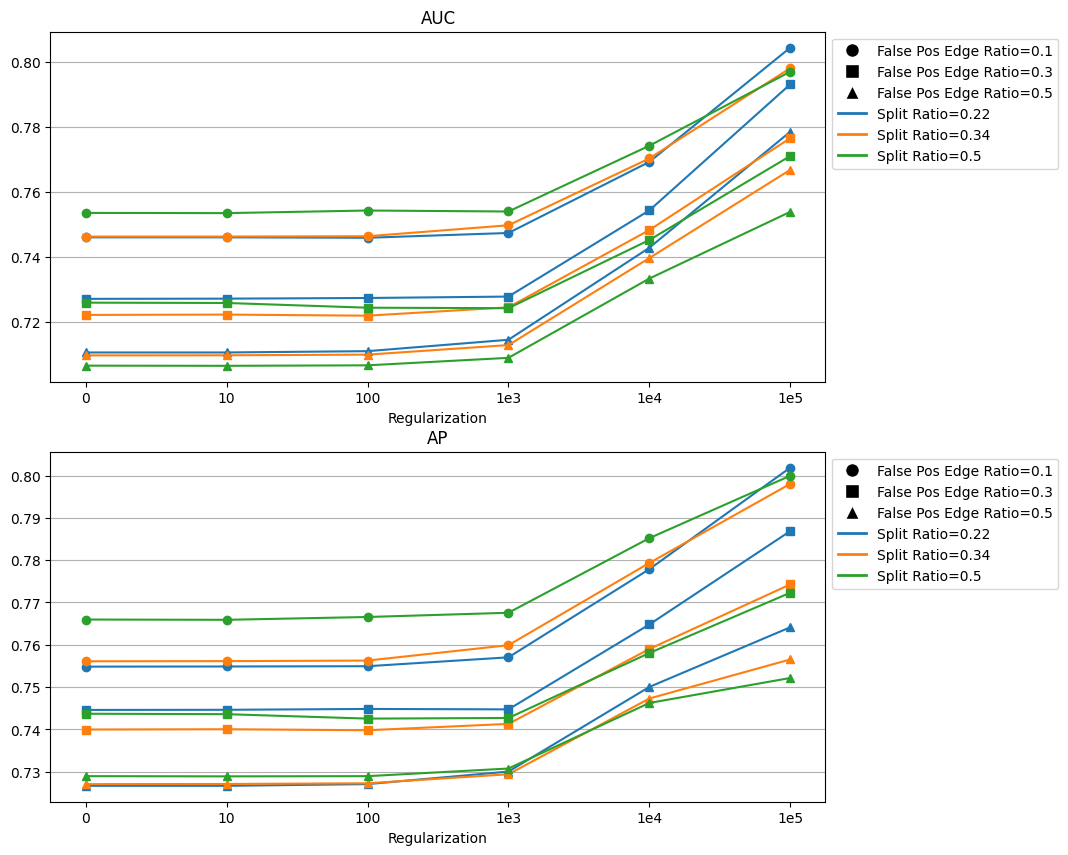

In [502]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

fig, ax = plt.subplots(2, 1, figsize=(10, 10))

# Define a list of markers
markers = ['o', 's', '^', '<', '>', 's', 'p', '*', 'h', 'H', '+', 'x', 'D', 'd', '|', '_']

# Create a color map
colors = list(mcolors.TABLEAU_COLORS.keys())
split_ratios = df_agg['split_ratio'].unique()
color_map = {split_ratio: colors[i % len(colors)] for i, split_ratio in enumerate(split_ratios)}

# Create a marker map
false_pos_edge_ratios = df_agg['false_pos_edge_ratio'].unique()
marker_map = {false_pos_edge_ratio: markers[i % len(markers)] for i, false_pos_edge_ratio in enumerate(false_pos_edge_ratios)}

# plot for different split_ratio and false_pos_edge_ratio
for split_ratio in split_ratios:
    for false_pos_edge_ratio in false_pos_edge_ratios:
        df_current = df_agg[(df_agg['split_ratio'] == split_ratio) & (df_agg['false_pos_edge_ratio'] == false_pos_edge_ratio)]
        # plot AUC
        ax[0].plot([0, 1, 2, 3, 4, 5], df_current['AUC_mean'],
                   label=f'split_ratio={split_ratio}, false_pos_edge_ratio={false_pos_edge_ratio}',
                   marker=marker_map[false_pos_edge_ratio], color=color_map[split_ratio])
        # add error bar
        ax[0].set_xticks([0, 1, 2, 3, 4, 5])
        ax[0].grid(axis='y')
        ax[0].set_xticklabels(['0', '10', '100', '1e3', '1e4', '1e5'])
        ax[0].set_xlabel('Regularization')
        ax[0].set_title('AUC')
        
        # plot AP
        ax[1].plot([0, 1, 2, 3, 4, 5], df_current['AP_mean'],
                   label=f'split_ratio={split_ratio}, false_pos_edge_ratio={false_pos_edge_ratio}',
                   marker=marker_map[false_pos_edge_ratio], color=color_map[split_ratio])
        ax[1].grid(axis='y')
        ax[1].set_xticks([0, 1, 2, 3, 4, 5])
        ax[1].set_xticklabels(['0', '10', '100', '1e3', '1e4', '1e5'])
        ax[1].set_xlabel('Regularization')
        ax[1].set_title('AP')

# Create a custom legend
from matplotlib.lines import Line2D
# Create a custom legend
from matplotlib.lines import Line2D
legend_elements = [Line2D([0], [0], marker=marker_map[false_pos_edge_ratio], color='w', label=f'False Pos Edge Ratio={false_pos_edge_ratio}',
                          markerfacecolor='k', markersize=10) for false_pos_edge_ratio in false_pos_edge_ratios] + \
                  [Line2D([0], [0], color=color_map[split_ratio], lw=2, label=f'Split Ratio={split_ratio}') for split_ratio in split_ratios]
ax[0].legend(handles=legend_elements, loc='upper left', bbox_to_anchor=(1, 1))
ax[1].legend(handles=legend_elements, loc='upper left', bbox_to_anchor=(1, 1))

# save above plot as a figure
fig.savefig('figures/pubmed_auc_ap.png', bbox_inches='tight', dpi=300)

In [262]:

df_agg_current = df_agg[(df_agg['dataset'] == dataset) & (df_agg['split_ratio'] == split_ratio) & (df_agg['false_pos_edge_ratio'] == false_pos_edge_ratio)]

# plot AUC
ax[0].plot([0, 1, 2, 3, 4, 5],
           df_agg_current['AUC']['mean'], label=f'{dataset}, split=0.5, false_pos_edge=0.5')
# ax[0].errorbar([0, 1, 2, 3, 4, 5],
#                df_agg[(df_agg['dataset'] == dataset)]['AUC']['mean'],
#                yerr=df_agg[(df_agg['dataset'] == dataset)]['AUC']['std'], fmt='o')
ax[0].set_xticks([0, 1, 2, 3, 4, 5])
ax[0].set_xticklabels(['0', '10', '100', '1e3', '1e4', '1e5'])
ax[0].set_xlabel('Regularization')
ax[0].set_title('AUC')
ax[0].legend()

# plot AP
ax[1].plot([0, 1, 2, 3, 4, 5],
           df_agg_current['AP']['mean'], label=f'{dataset}, split=0.5, false_pos_edge=0.5')
ax[1].set_xticks([0, 1, 2, 3, 4, 5])
ax[1].set_xticklabels(['0', '10', '100', '1e3', '1e4', '1e5'])
ax[1].set_xlabel('Regularization')
ax[1].set_title('AP')
ax[1].legend()

ValueError: x and y must have same first dimension, but have shapes (6,) and (0,)

ValueError: x and y must have same first dimension, but have shapes (6,) and (0,)

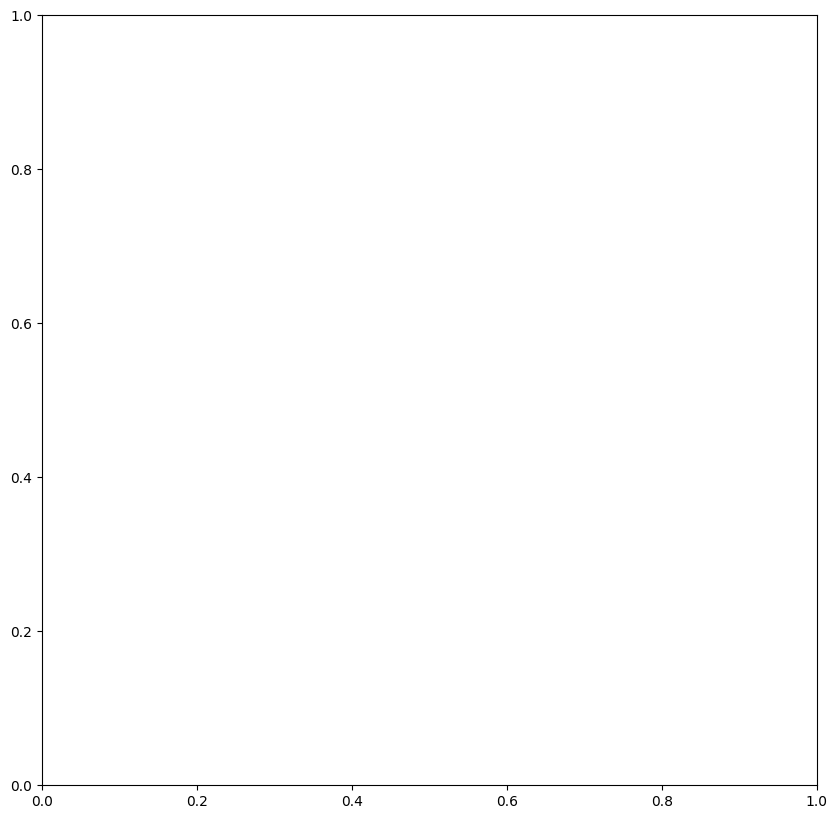

In [263]:
# plot execution time over different regularization
fig, ax = plt.subplots(figsize=(10, 10))
ax.plot([0, 1, 2, 3, 4, 5], df_agg[(df_agg['dataset'] == dataset)]['execution_time']['mean'], label=f'{dataset}, split=0.5, false_pos_edge=0.5')
ax.set_xticks([0, 1, 2, 3, 4, 5])
ax.set_xticklabels(['0', '1', '10', '100', '1e3', '1e4'])
ax.set_xlabel('Regularization')
ax.set_ylabel('Execution Time in seconds')
ax.set_title('Execution Time')

ValueError: x and y must have same first dimension, but have shapes (6,) and (54,)

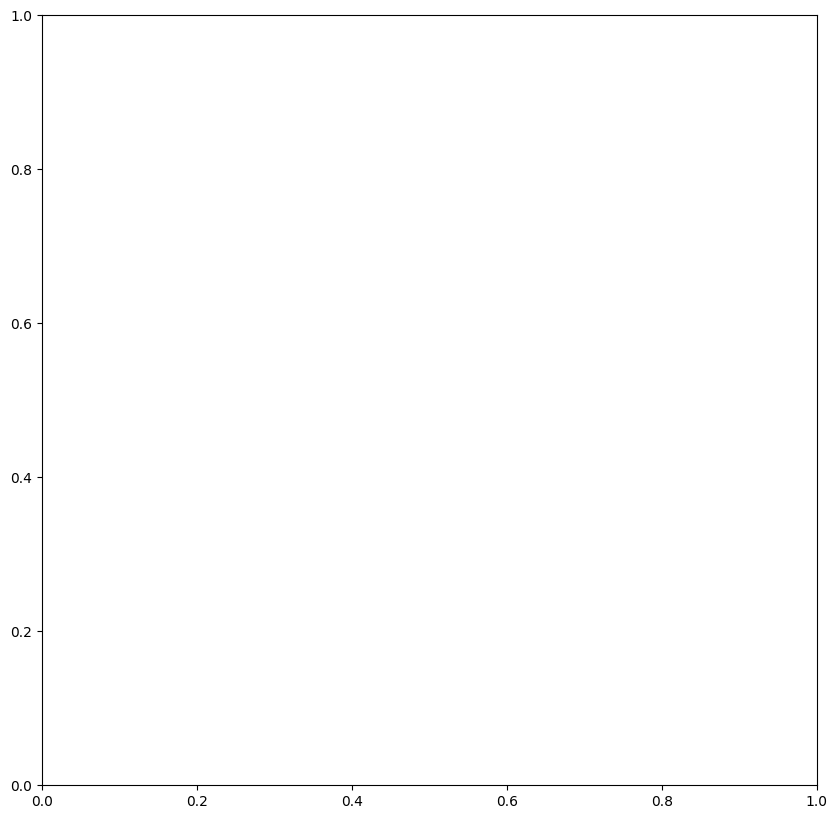

In [201]:
# plot execution time over different regularization
fig, ax = plt.subplots(figsize=(10, 10))
ax.plot([0, 1, 2, 3, 4, 5], df_agg[(df_agg['dataset'] == dataset)]['best_epochs']['mean'], label=f'{dataset}, split=0.5, false_pos_edge=0.5')
ax.set_xticks([0, 1, 2, 3, 4, 5])
ax.set_xticklabels(['0', '1', '10', '100', '1e3', '1e4'])
ax.set_xlabel('Regularization')
ax.set_ylabel('Execution Time in seconds')
ax.set_title('Execution Time')